In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(pheatmap))
suppressPackageStartupMessages(library(plyr))
library(pheatmap)
library(RColorBrewer)
library(viridis)

Loading required package: viridisLite



In [17]:
save_pheatmap <- function(x, filename, width=12, height=12){
  stopifnot(!missing(x))
  stopifnot(!missing(filename))
  if(grepl(".png",filename)){
    png(filename, width=width, height=height, units = "in", res=300)
    grid::grid.newpage()
    grid::grid.draw(x$gtable)
    dev.off()
  }
  else if(grepl(".pdf",filename)){
    pdf(filename, width=width, height=height)
    grid::grid.newpage()
    grid::grid.draw(x$gtable)
    dev.off()
  }
  else{
    print("Filename did not contain '.png' or '.pdf'")
  }}

In [6]:
meta_data=read.csv("/home/jupyter/BRI_Figures_Final_V2/Dataset/SF4_meta_data-2024-05-05.csv")
meta_data$ageAtEnrollment[meta_data$ageAtEnrollment == '89+'] <- '90'
meta_data$ageAtEnrollment<-as.numeric(meta_data$ageAtEnrollment)
meta_data<-meta_data[!is.na(meta_data$ageAtEnrollment),]
meta_data$Ages<-meta_data$ageAtEnrollment
meta_data <- meta_data[!duplicated(meta_data$sample.sampleKitGuid, fromLast = TRUE), ]
rownames(meta_data)<-meta_data$sample.sampleKitGuid

In [10]:
df_input<-read.csv("01_Olink/SF_Selected_Olink.csv",row.names = 1)

In [39]:
rownames(df_input)

[1] "CXCL17" "LTBP2"  "EDA2R"  "WNT9A"  "SCARF2" "GDF15"  "SOST"   "WFDC2" 
 [9] "ACTA2"  "NEFL"   "CTSV"   "RET"    "PROK1"  "PAEP"   "TNF"    "IL6"   
[17] "IL1B"   "IL11"

In [ ]:
column_order<-meta_data %>% filter(lab.sampleKitGuid %in% colnames(df_input)) %>% arrange(Ages)

df_input<-df_input[,column_order$sample.sampleKitGuid]

df_input<-df_input %>% drop_na()

annotation<-column_order %>% select(Ages)
rownames(annotation)<-column_order$sample.sampleKitGuid

In [31]:
row_annotation<-as.data.frame(rownames(df_input))

In [32]:
row_annotation$Group<-c(rep(c("Up in Older"),10),rep(c("Up in Younger"),4),rep(c("Inflammatory"),4))
rownames(row_annotation)<-rownames(df_input)

In [36]:
row_annotation<-row_annotation["Group"]

In [15]:
breaks_sequence <- seq(-1, 1, length.out = 100)

png 
  2

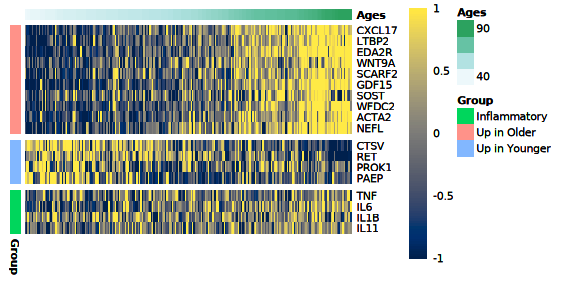

In [38]:
options(repr.plot.width = 120/25.4, repr.plot.height =  60/25.4)

p<-pheatmap(df_input, 
         breaks=breaks_sequence,
         cluster_rows=FALSE, 
         annotation=annotation,         annotation_row=row_annotation,
         fontsize = 6,
         cluster_cols=FALSE,
         gaps_row = c(10,14),
         show_colnames=FALSE,color= cividis(100),
         border_color=NA,
         scale='row')
p
save_pheatmap(p,'FigureB.pdf', width=120/25.4, height=60/25.4)